In [1]:
import pandas as pd

In [2]:
beer_df = pd.read_csv('beer.csv')

In [3]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [4]:
beer_df = beer_df.drop(2, axis = 0)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sn

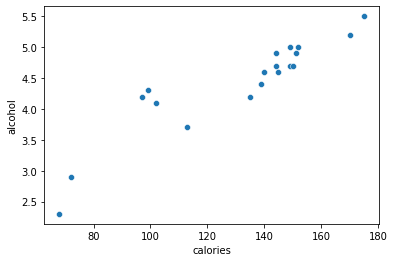

In [9]:
sn.scatterplot( data = beer_df,
                x = 'calories',
                y = 'alcohol');

### Normalizing the features

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_scaled_df = scaler.fit_transform(beer_df[['calories',
                                            'sodium',
                                            'alcohol',
                                            'cost']])

In [15]:
X_scaled_df

array([[ 0.42839039,  0.00799719,  0.37792744, -0.4506559 ],
       [ 0.66382808,  0.61578328,  0.64387639, -0.4506559 ],
       [ 1.30287324, -1.20757501,  1.0427998 ,  1.62090751],
       [ 0.69746203, -0.59978891,  0.77685086,  1.89711597],
       [ 0.46202434,  1.22356938,  0.24495297, -1.48643761],
       [ 1.47104302,  1.3755159 ,  1.44172322, -0.65781224],
       [ 0.59656016,  1.83135548,  0.37792744, -0.51970801],
       [-1.08513763, -0.75173544, -0.15397044, -0.4506559 ],
       [-0.61426225, -1.05562848, -0.95181727, -0.65781224],
       [ 0.29385456,  0.46383676,  0.24495297, -0.38160379],
       [-0.98423576,  0.00799719, -0.41991938, -0.24349956],
       [ 0.12568478, -0.59978891, -0.28694491,  0.0327089 ],
       [ 0.63019412,  0.61578328,  0.37792744,  1.82806386],
       [ 0.59656016, -1.35952153,  0.77685086,  2.0352202 ],
       [-2.12779026,  0.00799719, -2.81345987, -0.79591647],
       [ 0.26022061,  0.61578328, -0.02099597, -0.4506559 ],
       [ 0.42839039,  1.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
#sn.clustermap(X_scaled_df);

### Creating clusters

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(4, random_state = 100)

In [18]:
kmeans.fit(X_scaled_df)

KMeans(n_clusters=4, random_state=100)

In [19]:
kmeans.labels_

array([0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 3, 0, 0, 3, 2],
      dtype=int32)

In [20]:
beer_df['cluster'] = kmeans.labels_

In [21]:
beer_df

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
8,Miller_Lite,99,10,4.3,0.43,2
9,Budweiser_Light,113,8,3.7,0.40,2
10,Coors,140,18,4.6,0.44,0


In [22]:
beer_df.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster
0,Budweiser,144,15,4.7,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0
16,Hamms,139,19,4.4,0.43,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
6,Augsberger,175,24,5.5,0.40,0
10,Coors,140,18,4.6,0.44,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
4,Heineken,152,11,5.0,0.77,1
13,Becks,150,19,4.7,0.76,1


In [23]:
beer_df[beer_df.cluster == 1].mean()

calories    155.2500
sodium       10.7500
alcohol       4.9750
cost          0.7625
cluster       1.0000
dtype: float64

In [24]:
beer_df[beer_df.cluster == 1].std()

calories    9.912114
sodium      5.909033
alcohol     0.206155
cost        0.025000
cluster     0.000000
dtype: float64

In [ ]:
beer_df[beer_df.cluster == 1].mean()

### Participant Exercise: 1

- Create 5 number of clusters 
- Analyze the segments